In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data.csv')
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [5]:
df['Dangerous'].value_counts()

Dangerous
Yes    849
No      20
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   AnimalName  871 non-null    object
 1   symptoms1   871 non-null    object
 2   symptoms2   871 non-null    object
 3   symptoms3   871 non-null    object
 4   symptoms4   871 non-null    object
 5   symptoms5   871 non-null    object
 6   Dangerous   869 non-null    object
dtypes: object(7)
memory usage: 47.8+ KB


In [7]:
for i,col in enumerate(df.columns):
    print(f'Value counts in the {col}')

Value counts in the AnimalName
Value counts in the symptoms1
Value counts in the symptoms2
Value counts in the symptoms3
Value counts in the symptoms4
Value counts in the symptoms5
Value counts in the Dangerous


In [8]:
df.isnull().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     2
dtype: int64

In [9]:
df[df['Dangerous'].isnull()]

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
269,Sheep,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN
695,Buffaloes,Teeth griding,Apathy,Dehydration,Ruminal stasis,Watery faeces,NaN


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

AnimalName    0
symptoms1     0
symptoms2     0
symptoms3     0
symptoms4     0
symptoms5     0
Dangerous     0
dtype: int64

In [12]:
df = pd.get_dummies(df, drop_first=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df.columns

Index(['AnimalName_Black-tailed deer', 'AnimalName_Buffaloes',
       'AnimalName_Cattle', 'AnimalName_Chicken', 'AnimalName_Deer',
       'AnimalName_Dog', 'AnimalName_Dogs', 'AnimalName_Donkey',
       'AnimalName_Duck', 'AnimalName_Elephant',
       ...
       'symptoms5_slow growth', 'symptoms5_sudden death',
       'symptoms5_swollen abdomen', 'symptoms5_trembling',
       'symptoms5_twisted neck', 'symptoms5_urination problem',
       'symptoms5_weakness', 'symptoms5_ increased passing gas',
       'symptoms5_ pain and bloating', 'Dangerous_Yes'],
      dtype='object', length=1148)

In [15]:
X = df.drop('Dangerous_Yes', axis=1)
y = df['Dangerous_Yes']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier()

In [19]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
def report_model(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

c:\Users\mabha\.conda\envs\kidneydisease\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabha\.conda\envs\kidneydisease\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mabha\.conda\envs\kidneydisease\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.00      0.00      0.00         5
        True       0.98      1.00      0.99       282

    accuracy                           0.98       287
   macro avg       0.49      0.50      0.50       287
weighted avg       0.97      0.98      0.97       287



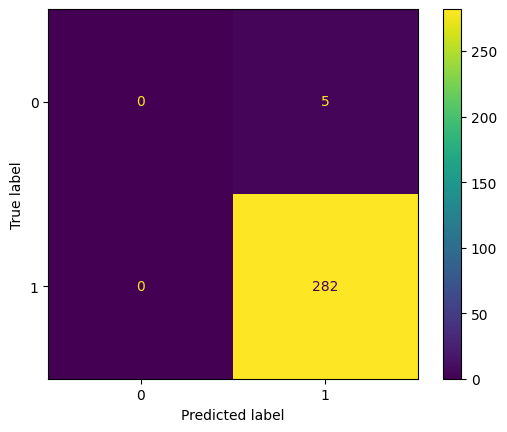

In [21]:
report_model(rfc)